In [1]:
%pylab inline
from sys import platform
from tqdm import trange
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

if platform == "win32":
    path = 'C:/Users/olive/'
elif platform == "darwin":
    path = '~/'

%run SentimentAnalysis.ipynb
%run TermSelection.ipynb

Populating the interactive namespace from numpy and matplotlib


In [2]:
### LOADS PROCESSED DATA

c_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/comments.csv')
s_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/submissions.csv')

s_df = s_df.sort_values(by='datetime')
c_df = c_df.sort_values(by='datetime')

In [10]:
### QUERY DATAFRAME FOR NON NEUTRAL COMMENTS

c_df = c_df.query('sentiment != "neutral"')

In [11]:
### PRINTS COMMNET COUNT PER DAY OVER TIME

comment_count = c_df['datetime'].dt.date.value_counts()
submission_count = s_df['datetime'].dt.date.value_counts()

submission_count = submission_count.sort_index(ascending=True)
comment_count = comment_count.sort_index(ascending=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(comments)

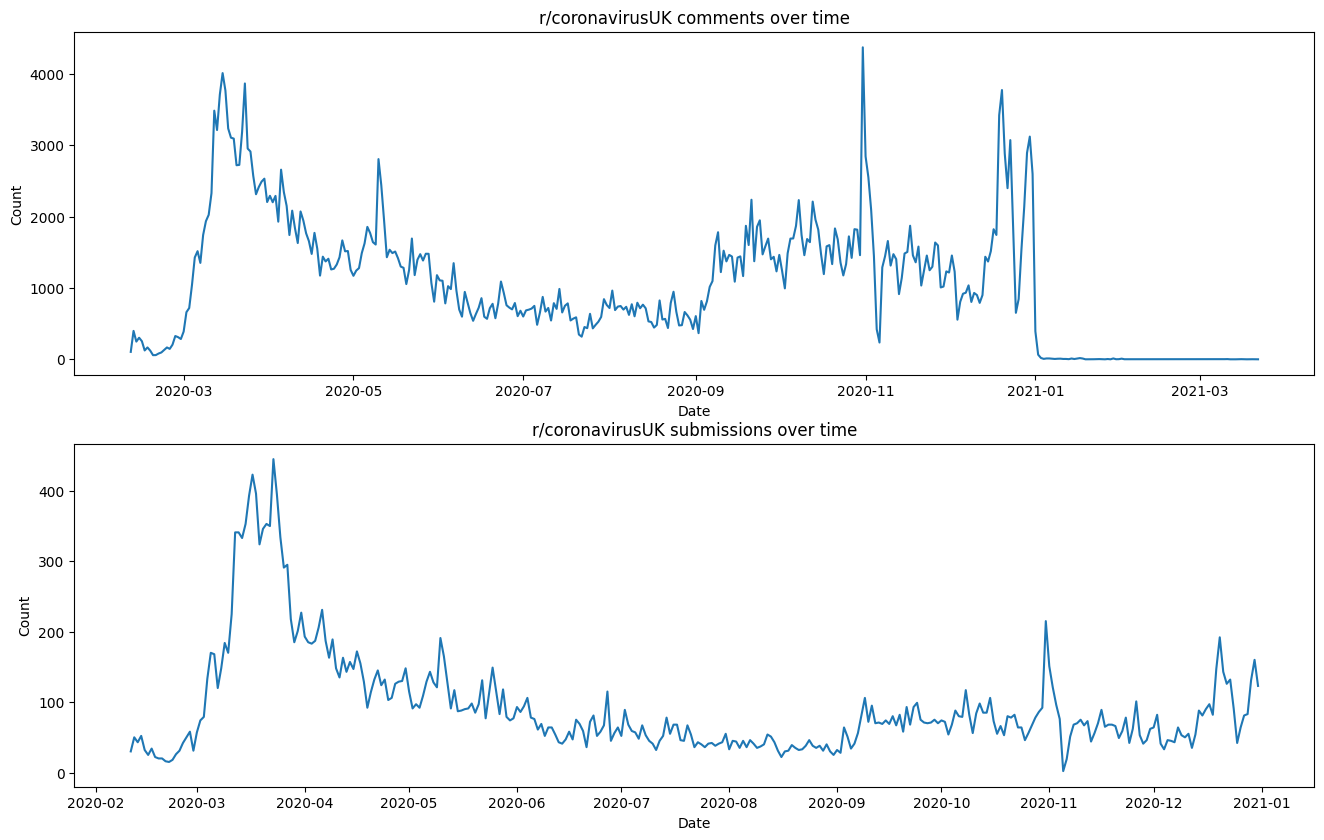

In [12]:
### PLOTTING COMMENTS AND SUBMISSIONS ON r/coronavirusUK OVER TIME

fig, (ax1, ax2) = plt.subplots(2, dpi=100)
fig.set_size_inches(16, 10)

ax1.set_title('r/coronavirusUK comments over time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.plot(comment_count.index, comment_count.values)

ax2.set_title('r/coronavirusUK submissions over time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count')
ax2.plot(submission_count.index, submission_count.values)

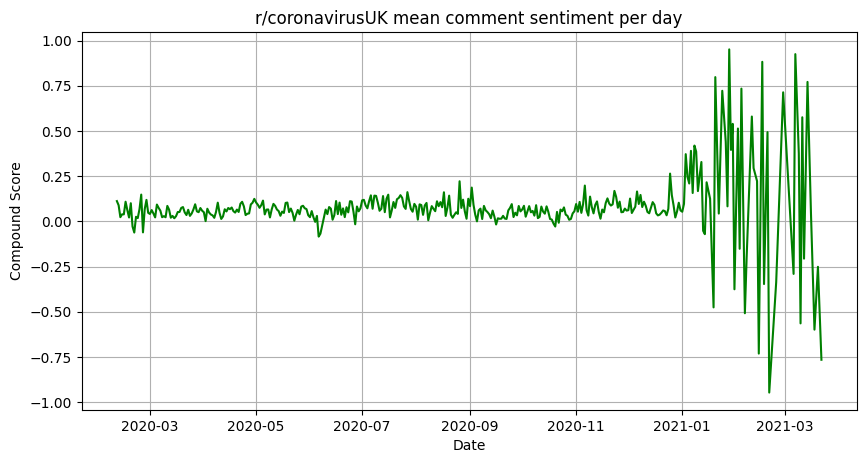

In [13]:
### PLOTTING MEAN SENTIMENT OF ALL COMMENTS PER DAY OVER TIME

comments = c_df.groupby(
    c_df['datetime'].dt.date
).agg(
    {
        'compound_score': mean
    }
)

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10, 5)

axs.set_title('r/coronavirusUK mean comment sentiment per day')
axs.set_xlabel('Date')
axs.set_ylabel('Compound Score')
axs.grid()
axs.plot(comments, 'g')

In [34]:
### SUBMISSION COMPOUND SCORE CALCULATED BY MEAN OF COMMENTS FROM EACH SUBMISSION

agg_sub_compound_score = c_df.groupby(
    c_df['submission_id']
).agg(
    {
        'compound_score': mean
    }
)

### MERGES SUB DATAFRAME WITH MEAN COMPOUND SCORE FOR ALL COMMENTS OF EACH SUBMISSION
s_df = pd.merge(s_df, agg_sub_compound_score, left_index=True, right_index=True)

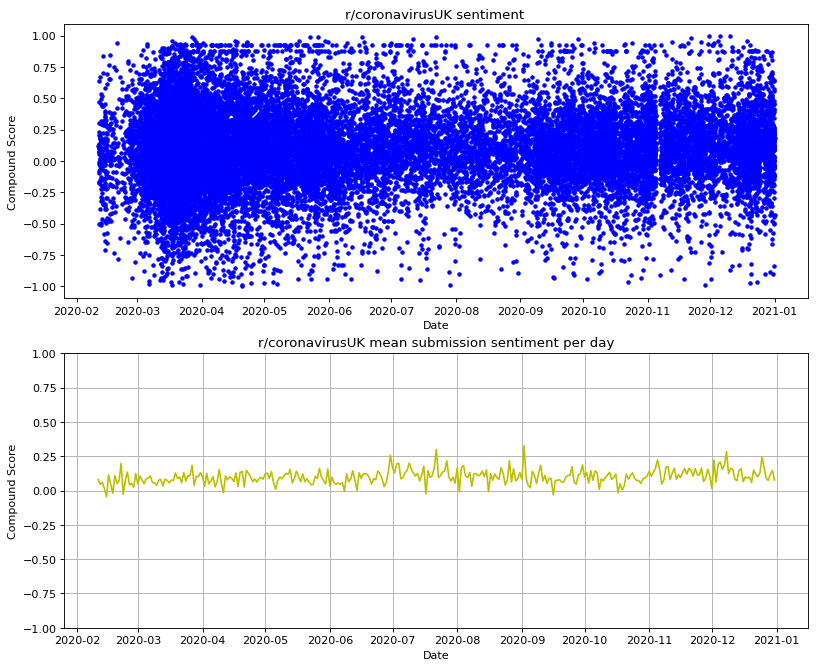

In [35]:
### PLOTTING COMMENTS BY SUBMISSION ON r/coronavirusUK OVER TIME')

daily_submission_score = s_df.groupby(
    grouped_comments['datetime'].dt.date
).agg(
    {
        'compound_score': mean
    }
)

fig, (ax1, ax2) = plt.subplots(2, dpi=80)
fig.set_size_inches(12, 10)

ax1.set_title('r/coronavirusUK sentiment ')
ax1.set_xlabel('Date')
ax1.set_ylabel('Compound Score')
ax1.plot(grouped_comments['datetime'], 
         grouped_comments['compound_score'], 
         'b.')

### PLOTTING MEAN SUBMISSION SENTIMENT PER DAY

ax2.set_title('r/coronavirusUK mean submission sentiment per day')
ax2.set_xlabel('Date')
ax2.set_ylim(top=1.0, bottom=-1.0)
ax2.set_ylabel('Compound Score')
ax2.grid()
ax2.plot(daily_submission_score.index, 
         daily_submission_score['compound_score'], 
         'y')

In [42]:
# Count No of submissions with low comment count

grouped_comments = c_df.groupby(c_df['submission_id'])
grouped_comments.first(5)
# sub_comment_count.values.max()

# fig, (axs) = plt.subplots(1, dpi=80)
# fig.set_size_inches(16, 10)

# ax1.set_title('r/coronavirusUK comments over time')
# axs.set_xlabel('Submission')
# axs.set_ylabel('Count')
# axs.plot(sub_comment_count.index, sub_comment_count.values)

TypeError: unhashable type: 'Index'

In [7]:
### TRANSFORMS COMMENT DATAFRAME INTO DICTIONARY TO BE VECTORIZED

df_to_dict = c_df.copy().query('sentiment != "neutral"').reset_index()

df_to_dict['target'] = df_to_dict.apply(lambda x: get_target(x['sentiment']), axis=1)

df_to_dict = df_to_dict.drop(columns=['datetime', 
                                      'sentiment', 
                                      'compound_score', 
                                      'submission_id', 
                                      'parent_id'])

df_dict = {'body': list(df_to_dict['body']), 
           'target': list(df_to_dict['target'])}

<BarContainer object of 25 artists>

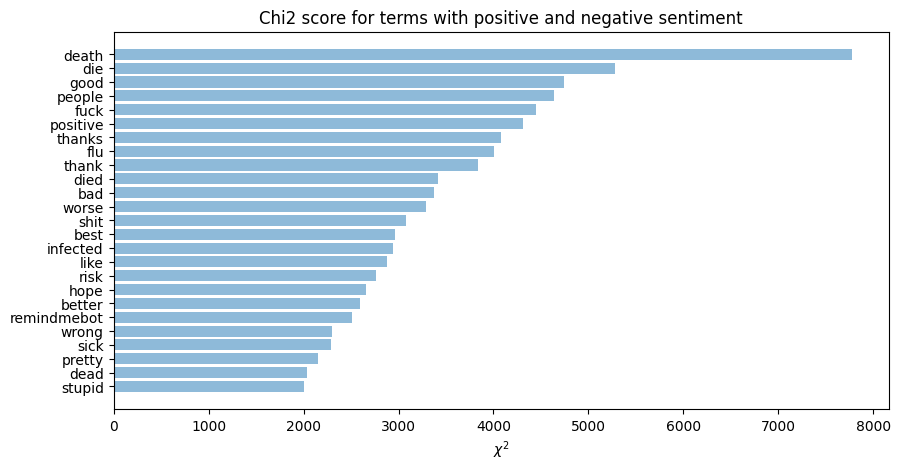

In [8]:
### RETURNS THE TOP N TERMS
topchi2 = document_vectorizer(df_dict, 25)

x = range(len(topchi2[1]))
labels = topchi2[0]

fig, ax1 = plt.subplots(1, dpi=100)
fig.set_size_inches(10, 5)

ax1.set_title('Chi2 score for terms with positive and negative sentiment')
ax1.set_xlabel('$\chi^2$')
ax1.set_yticks(x)
ax1.set_yticklabels(labels)
ax1.barh(x, topchi2[1], align='center', alpha=0.5)

In [ ]:
c_df.sample(10)

In [ ]:
s_df.sample(5)